In [8]:
import pandas as pd
import numpy as np

import pickle
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load data

In [38]:
# boxes from get_relevant_sensor_boxes
boxes = pd.read_pickle("data/boxes_18-19_19-20.pkl")

# data for new years for all cities, from get_data_new_years
with open('data/city_data_dfs_PM25.pickle', 'rb') as handle:
    city_data_dfs = pickle.load(handle)
    
# wether data for new years from get_weather_info_newyears
with open('data/cities_weather_newyears.pkl', 'rb') as handle:
    cities_weather = pickle.load(handle)
    
cities = [city for city in city_data_dfs]

## First plotting of data

In [10]:
hours = pd.DataFrame([datetime.timedelta(hours=1)]*19,columns=["deltas"])
hours.deltas = hours.deltas.cumsum()
hours["date_time"] = hours.deltas + pd.to_datetime("2018-12-31-12:00:00") - datetime.timedelta(hours = 1)
hours = hours[["date_time"]]

### plot of all cities 18/19 and 19/20 -- aggregate

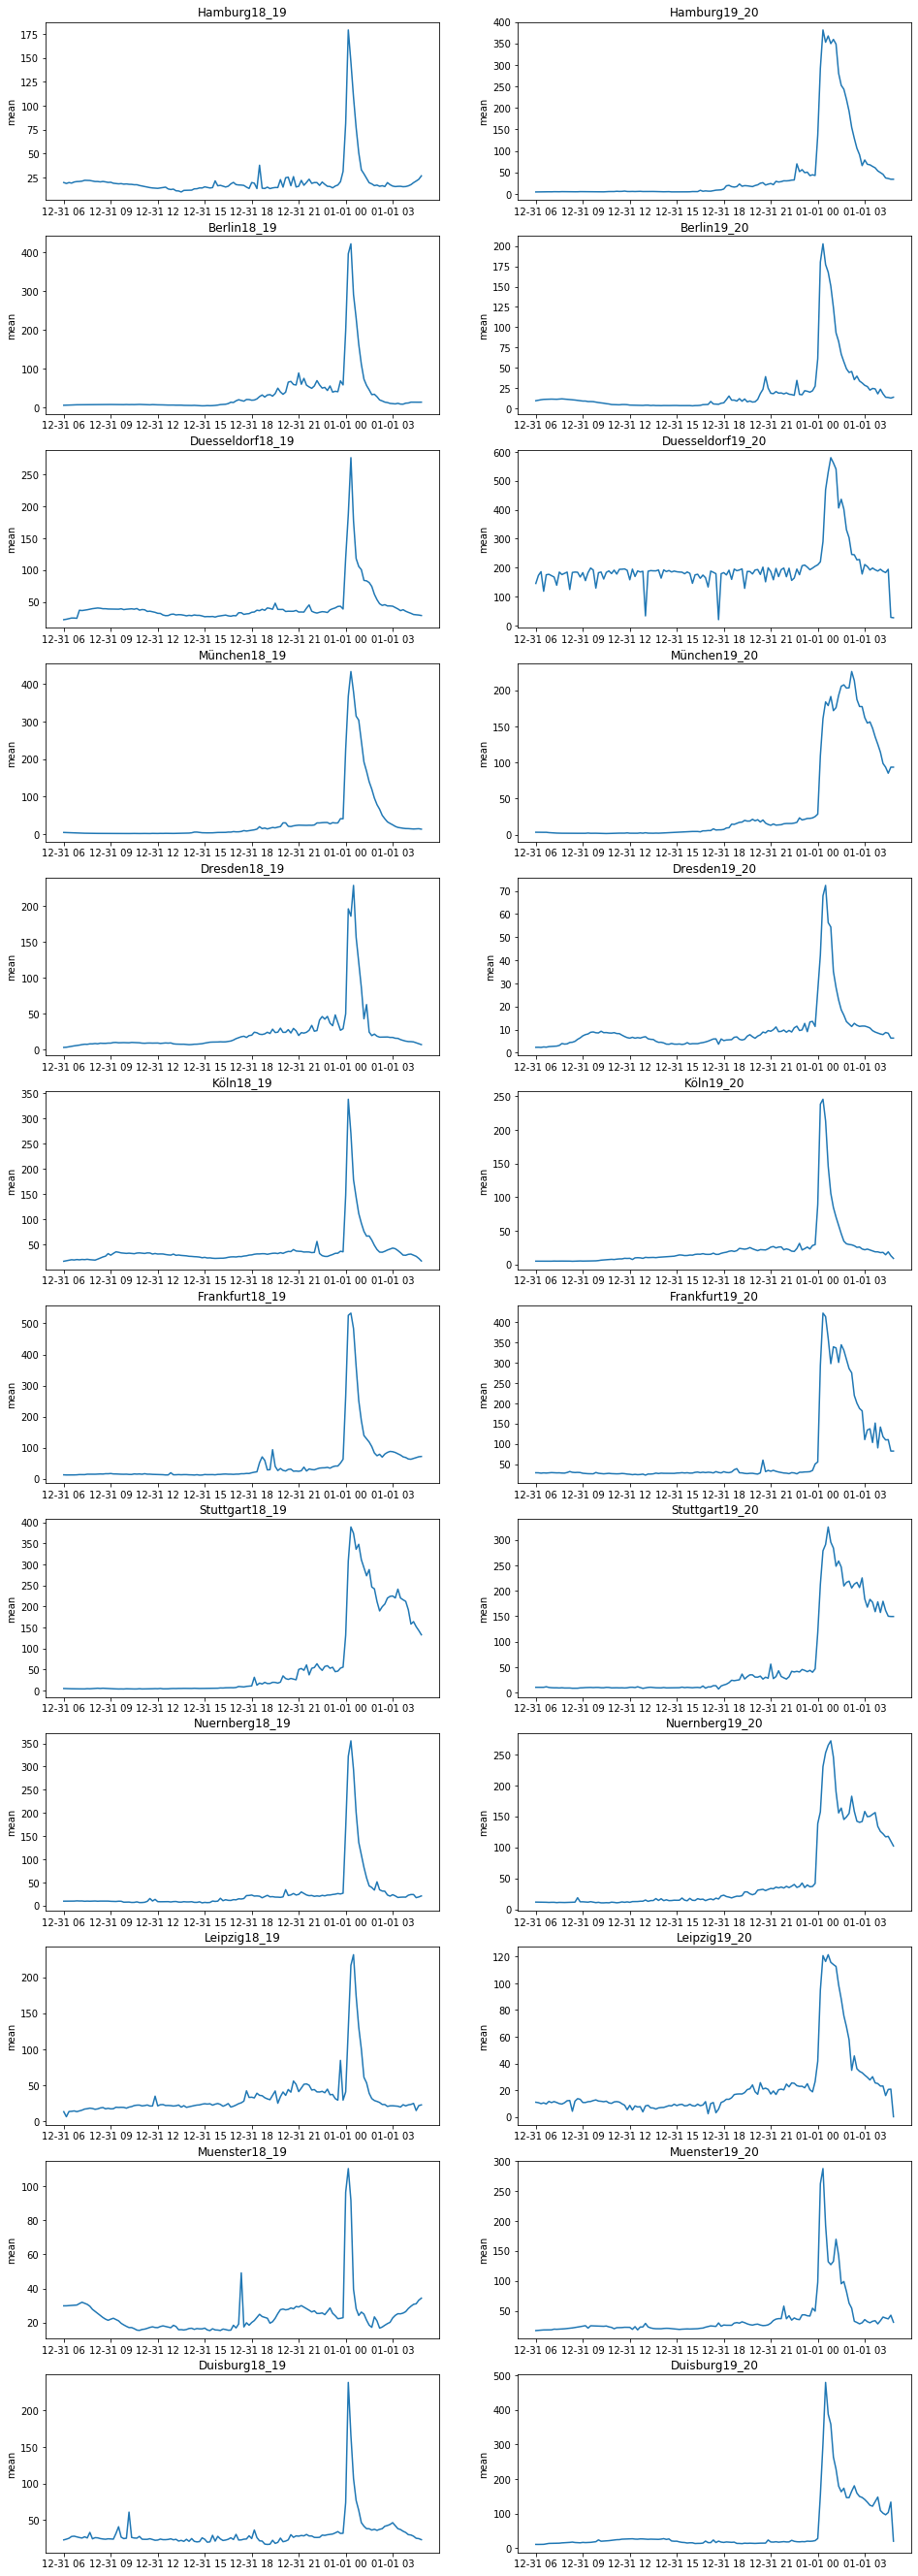

In [11]:
fig, ax = plt.subplots(len(cities),2,figsize=(16,4*len(cities)));


for i in range(len(cities)):
    sns.lineplot(data=city_data_dfs[cities[i]]["18_19"],
                 x="date_time",
                 y="mean",
                 ax=ax[i,0]);
    ax[i,0].set(title = cities[i]+"18_19",
                xlabel = "")

    
    sns.lineplot(data=city_data_dfs[cities[i]]["19_20"],
                 x="date_time",
                 y="mean",
                 ax=ax[i,1]);
    ax[i,1].set(title = cities[i]+"19_20",
                xlabel = "")


### plot all sensors for single cities

#### functions

In [12]:
def plot_all_sensors(city,city_data_dfs):
    sensors = list(city_data_dfs[city]["18_19"].drop(columns=["date_time","mean"]).columns)
    
    num_sensors = len(sensors)
    fig, ax = plt.subplots(num_sensors,2,figsize=(16,4*num_sensors));
    
    
    i=0
    for sensor in sensors:
        
        sns.lineplot(data=city_data_dfs[city]["18_19"],
                     x="date_time",
                     y=sensor,
                     ax=ax[i,0]);
        ax[i,0].set(title = sensor,
                    xlabel = "",
                    ylabel ="PM10")
        
        sns.lineplot(data=city_data_dfs[city]["19_20"],
                     x="date_time",
                     y=sensor,
                     ax=ax[i,1]);
        ax[i,1].set(title = sensor,
                    xlabel = "",
                    ylabel = "PM10")
        i += 1

In [13]:
def drop_sensors_and_recal_mean(sensors_list,city_data_df):
    """
    for a city_data_df this method drops the sensors specified in sensors_list and calculates the new mean
    """
    # drop
    df = city_data_df.copy()
    df["18_19"].drop(columns = sensors_list,inplace= True)
    df["19_20"].drop(columns = sensors_list,inplace= True)
    
    # re-calculate the mean
    df["18_19"]["mean"] = (df["18_19"]
                           .drop(columns = ["date_time","mean"])
                           .mean(axis=1))
    df["18_19"]["mean"] = (df["18_19"]
                           .drop(columns = ["date_time","mean"])
                           .mean(axis=1))

    return df

#### single cities

##### Hamburg

data from public sensors also show a doubling of PM10 values, cf. http://luft.hamburg.de/clp/pm10/clp1/

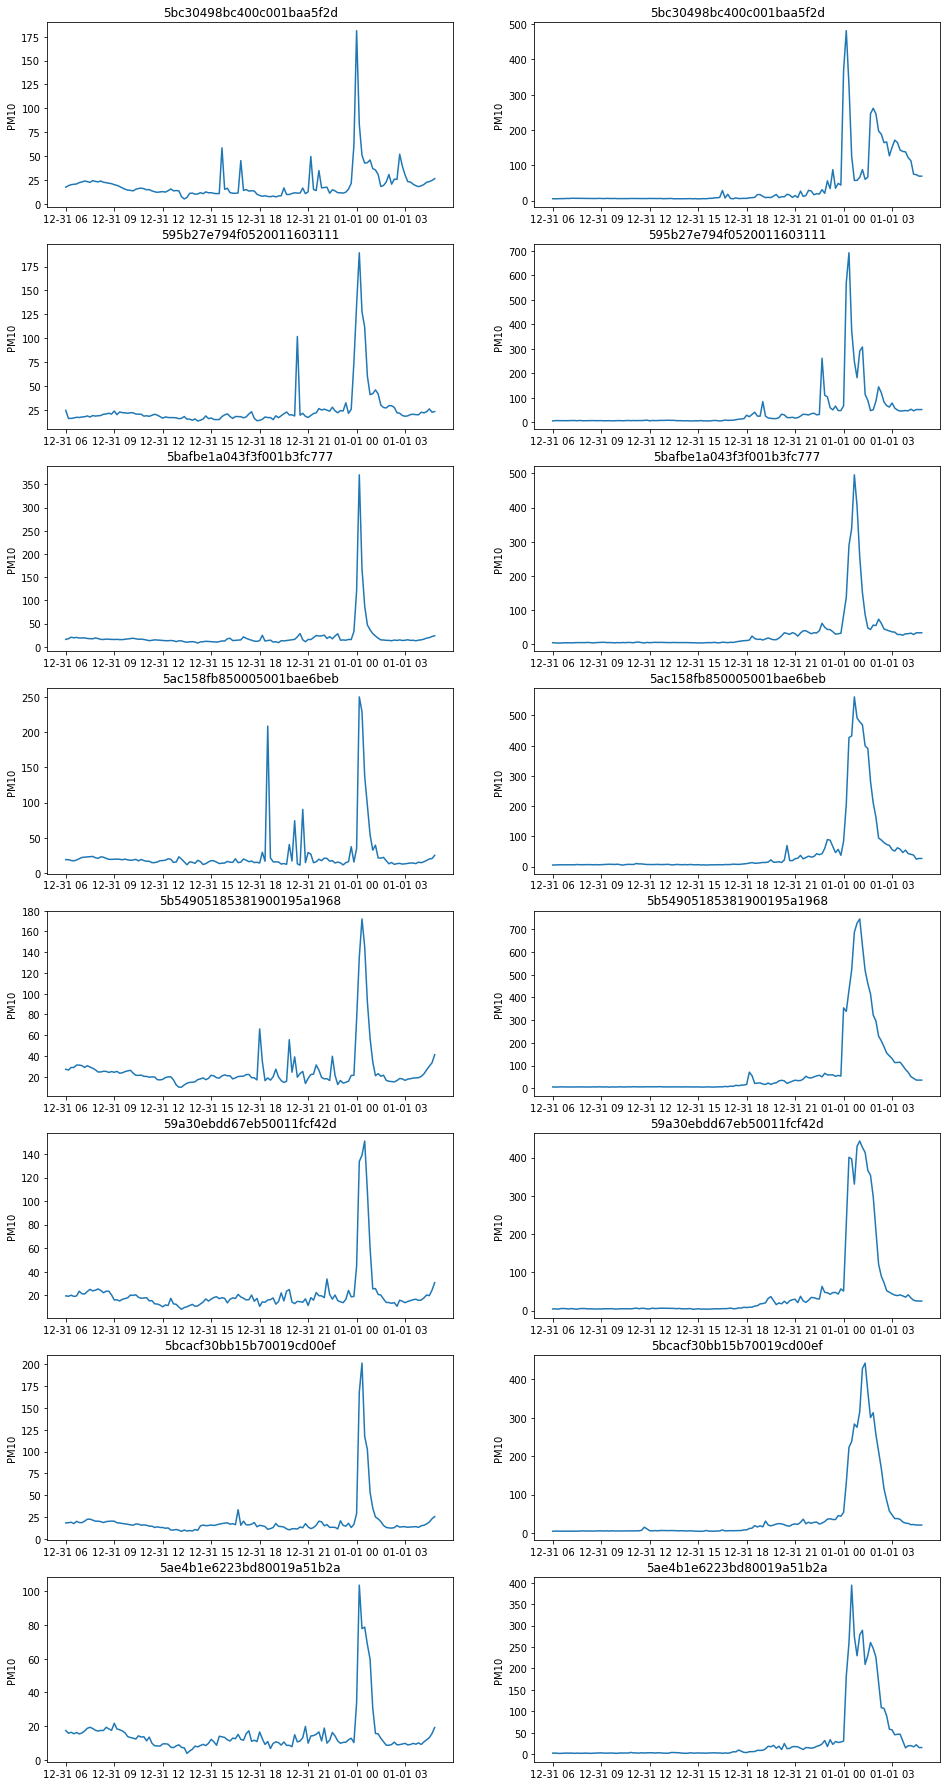

In [14]:
plot_all_sensors("Hamburg",city_data_dfs)

##### Berlin

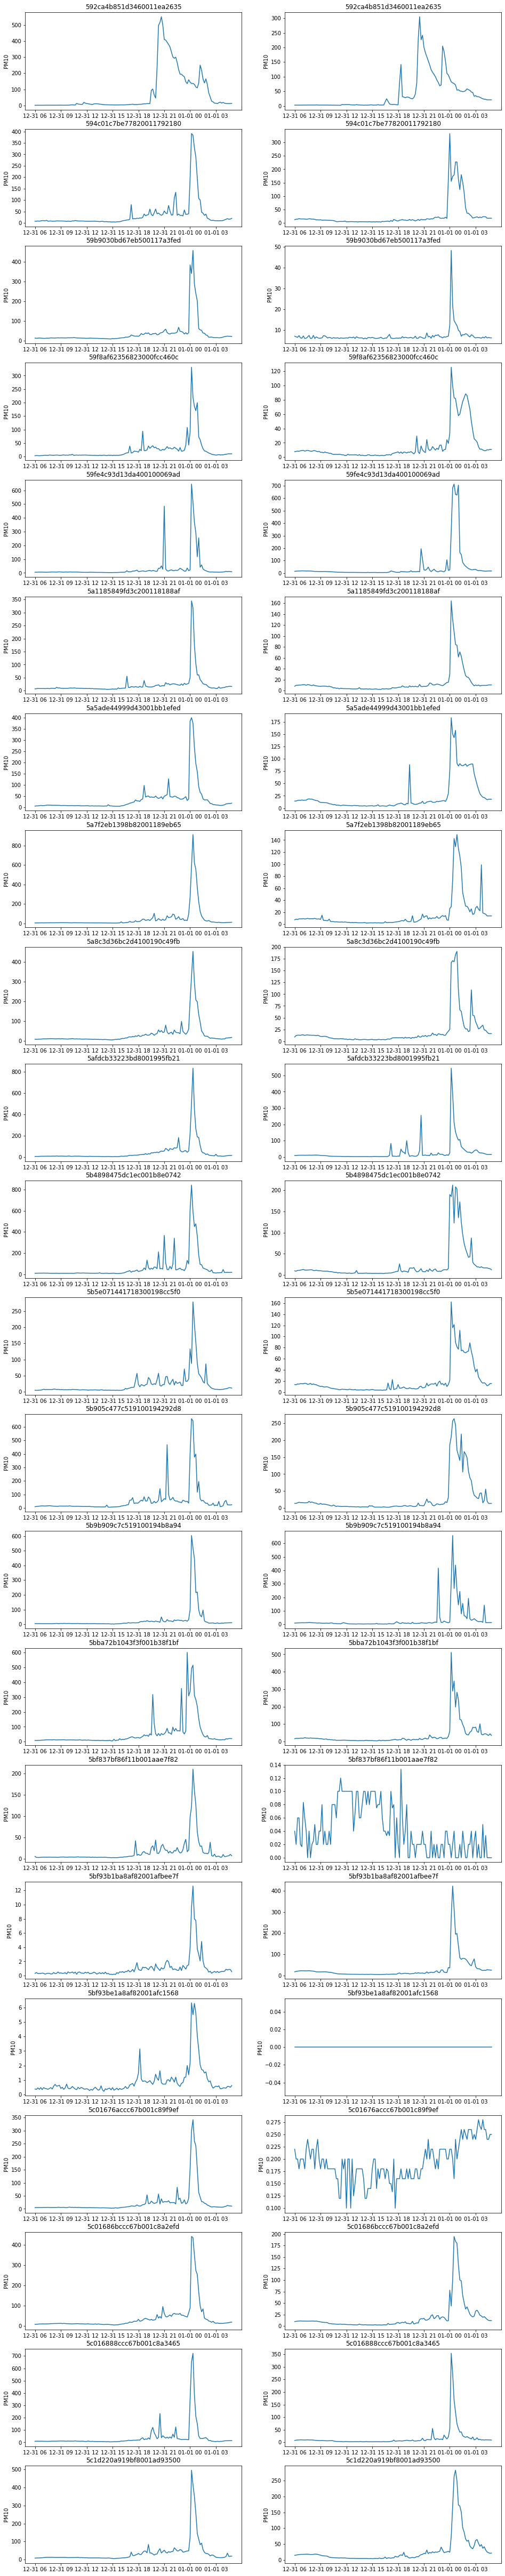

In [15]:
plot_all_sensors("Berlin",city_data_dfs)

In [16]:
# something went wrong with the following sensors, so we drop them
off_sensors = ['5c01676accc67b001c89f9ef',
               '5bf93be1a8af82001afc1568',
               '5bf837bf86f11b001aae7f82']

city_data_dfs["Berlin"] = drop_sensors_and_recal_mean(off_sensors,city_data_dfs["Berlin"])

##### München

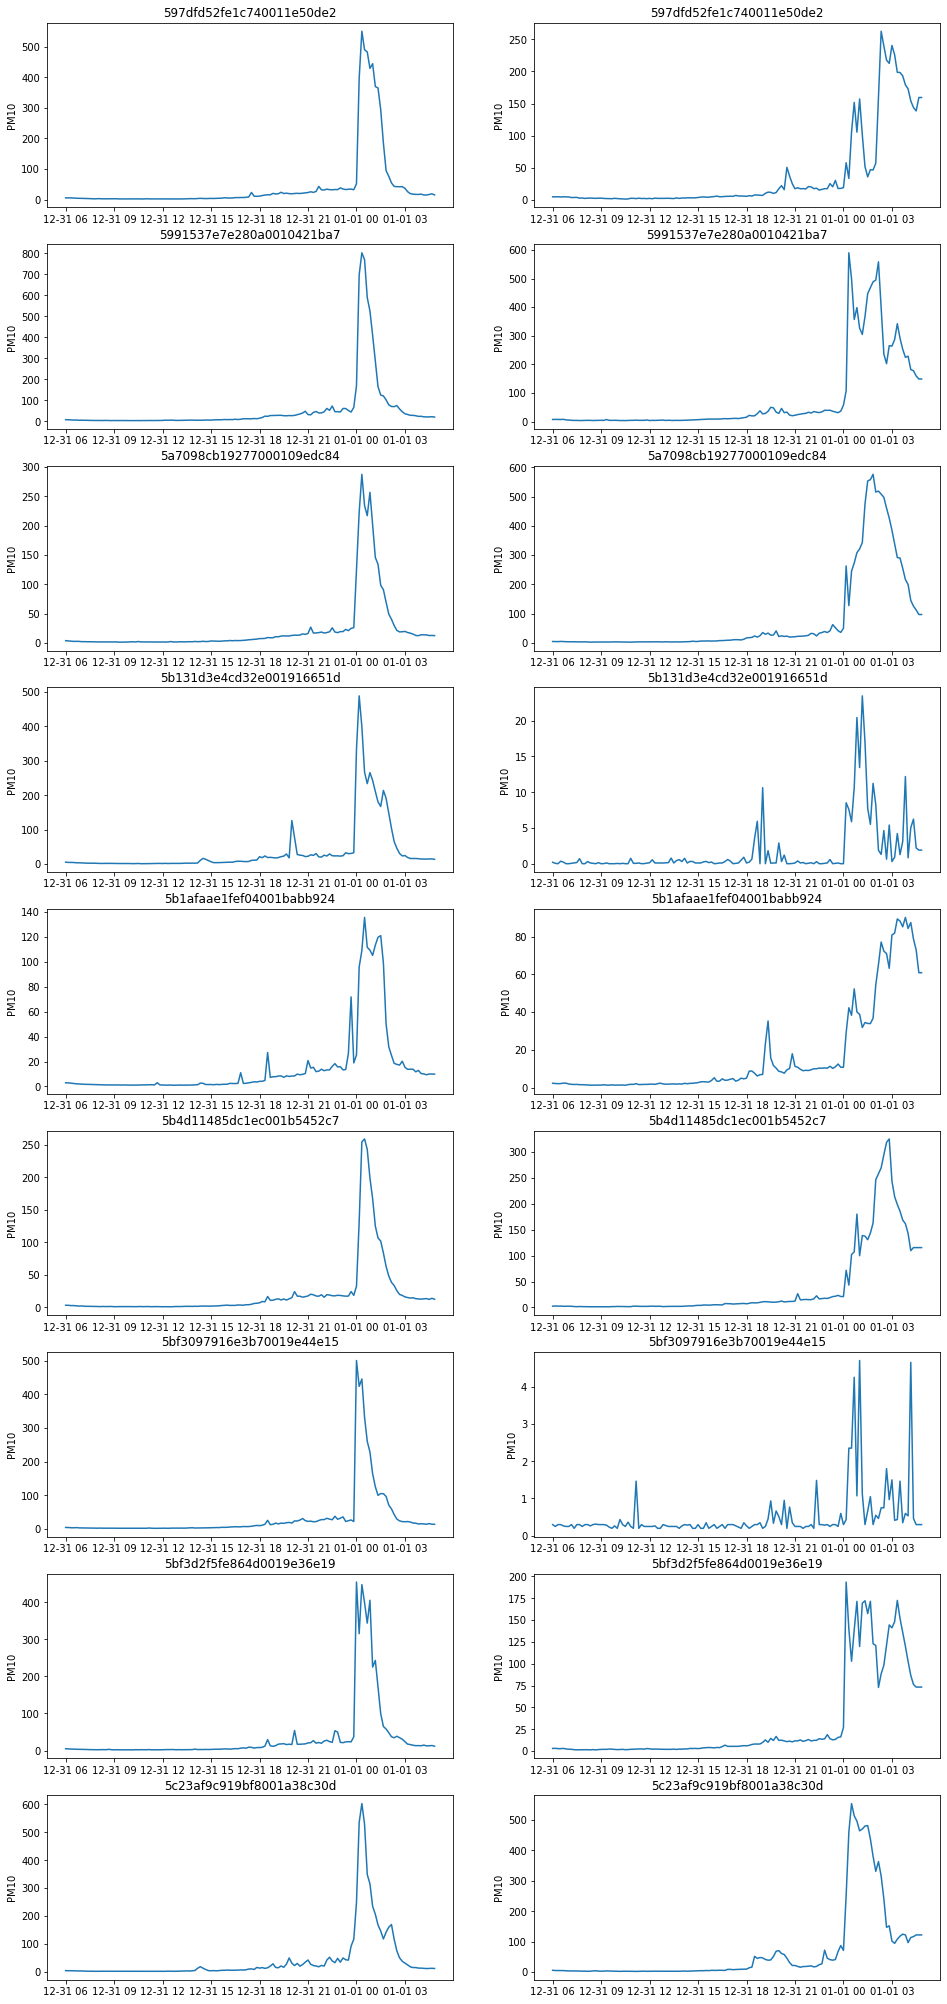

In [17]:
plot_all_sensors("München",city_data_dfs)

##### Dresden

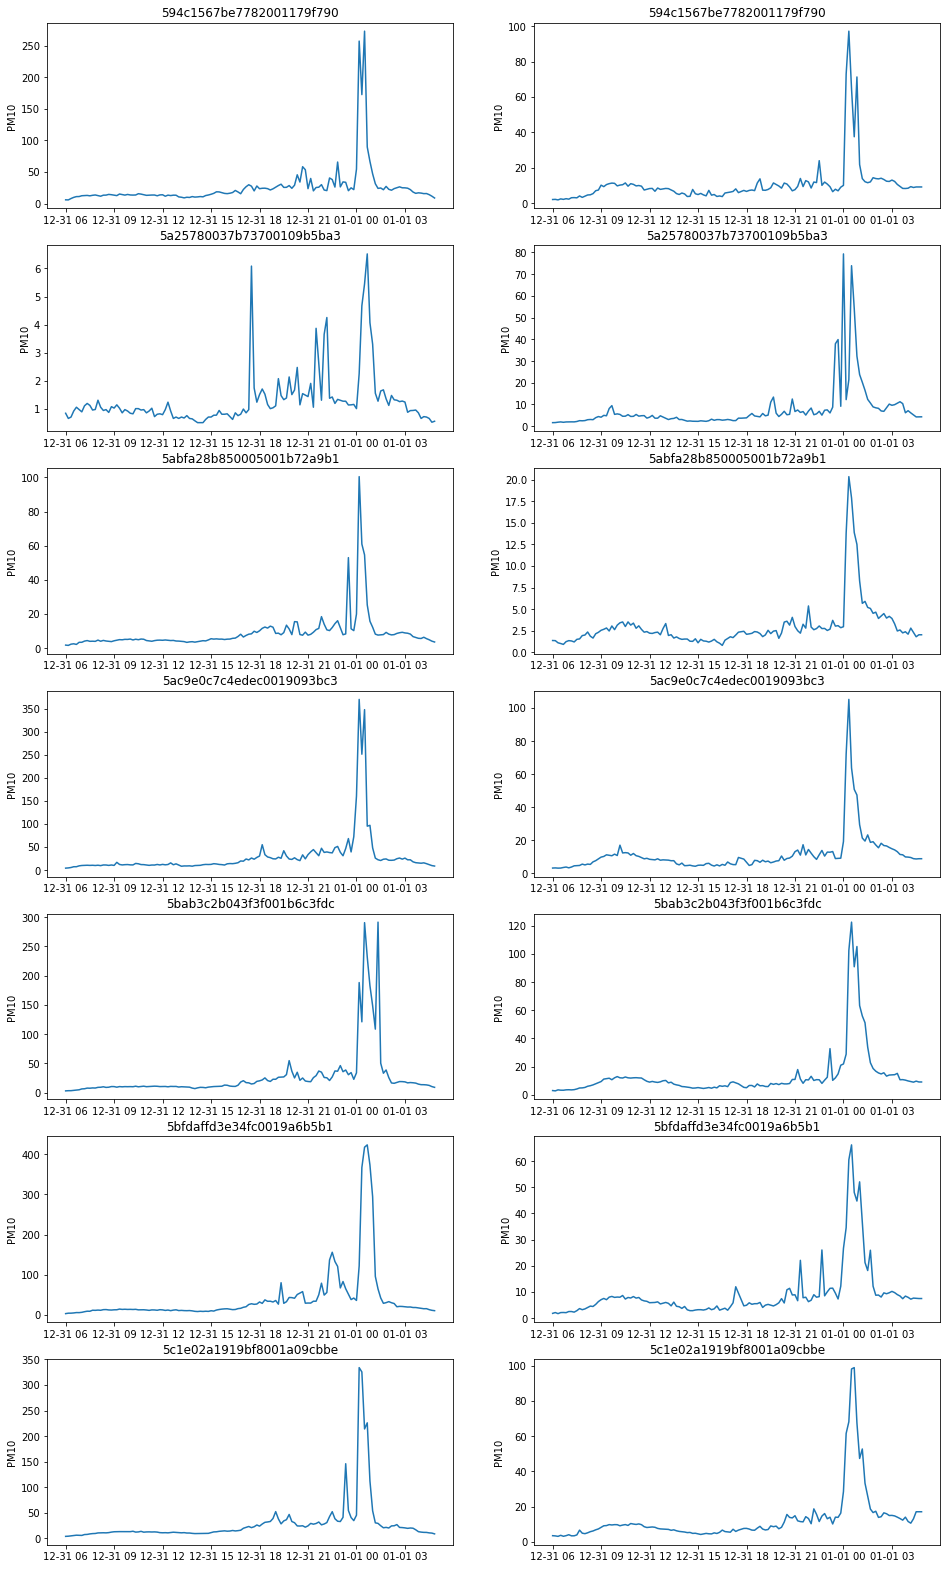

In [18]:
plot_all_sensors("Dresden",city_data_dfs)

##### Köln

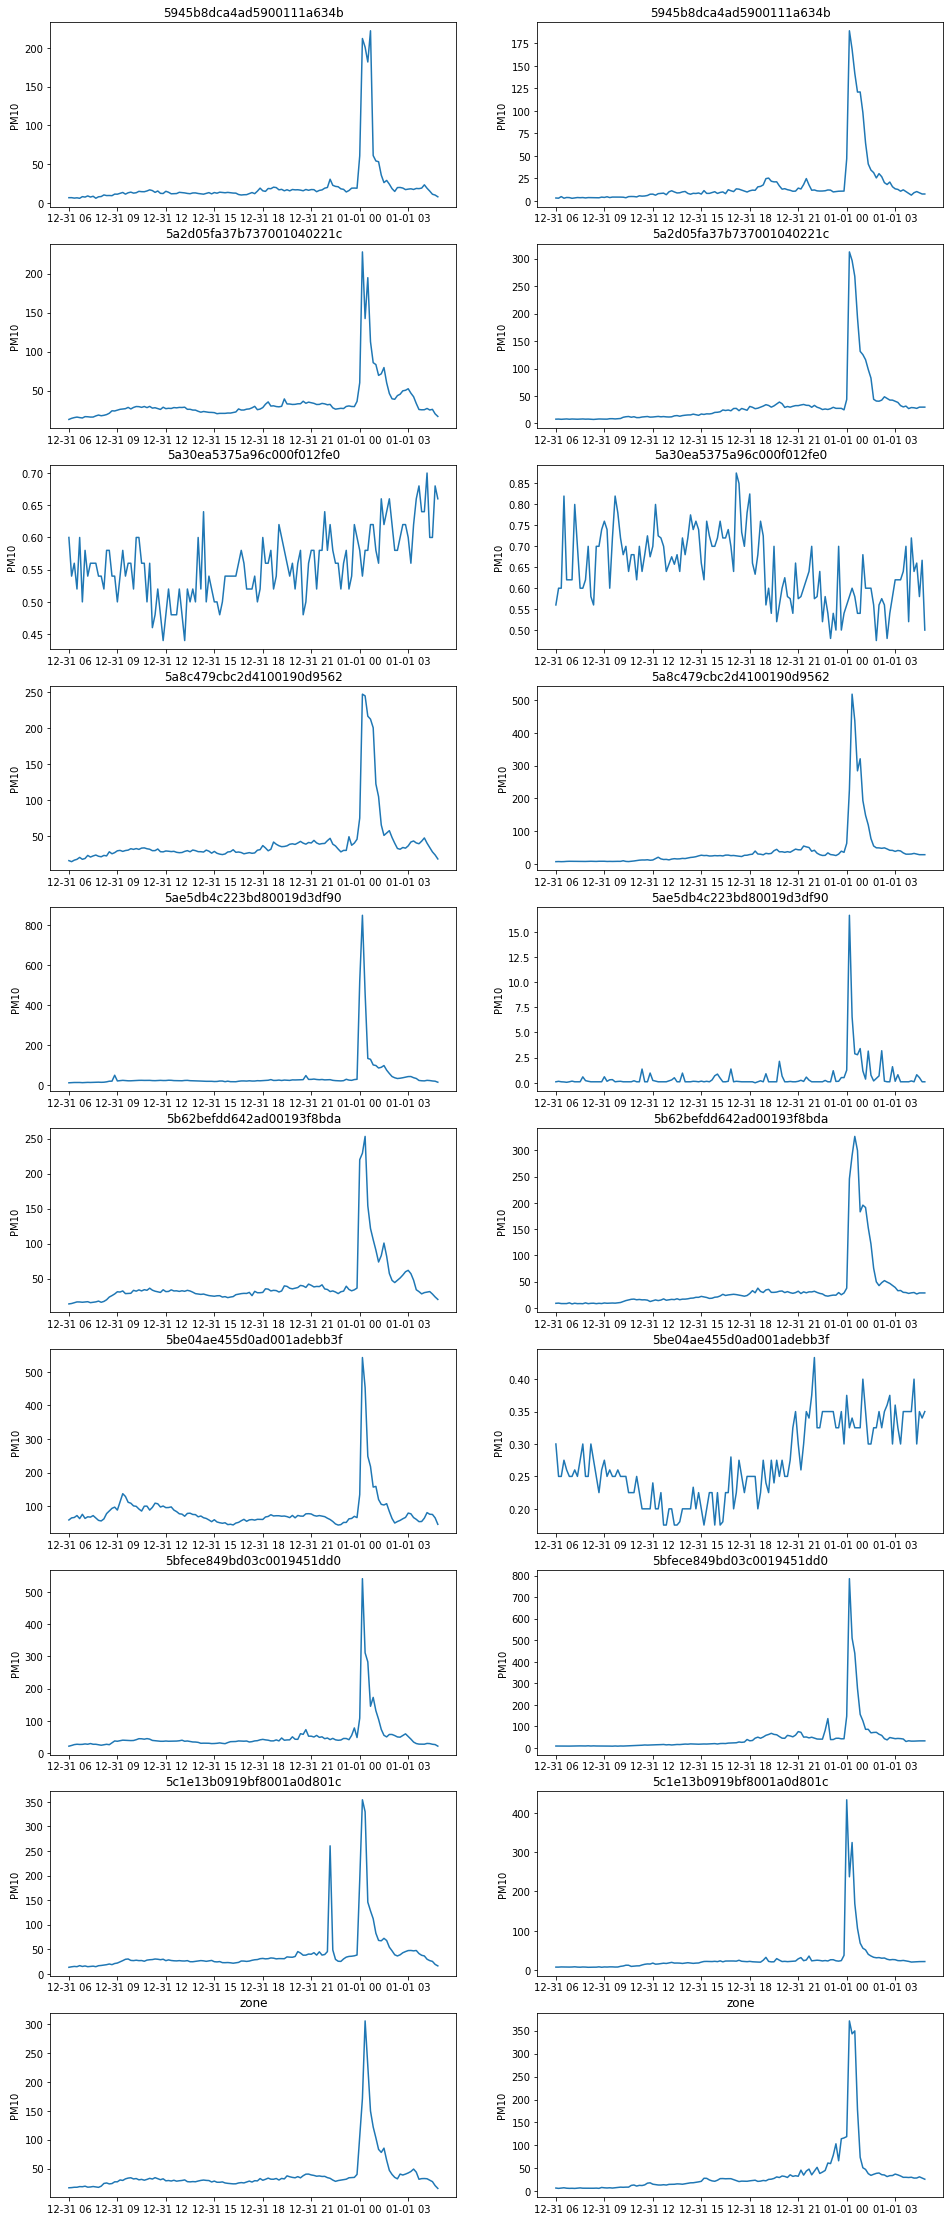

In [19]:
plot_all_sensors("Köln",city_data_dfs)

In [20]:
# something is off with the sensors:
off_sensors = ['5a30ea5375a96c000f012fe0','5be04ae455d0ad001adebb3f']


city_data_dfs["Köln"] = drop_sensors_and_recal_mean(off_sensors,city_data_dfs["Köln"])




##### Frankfurt

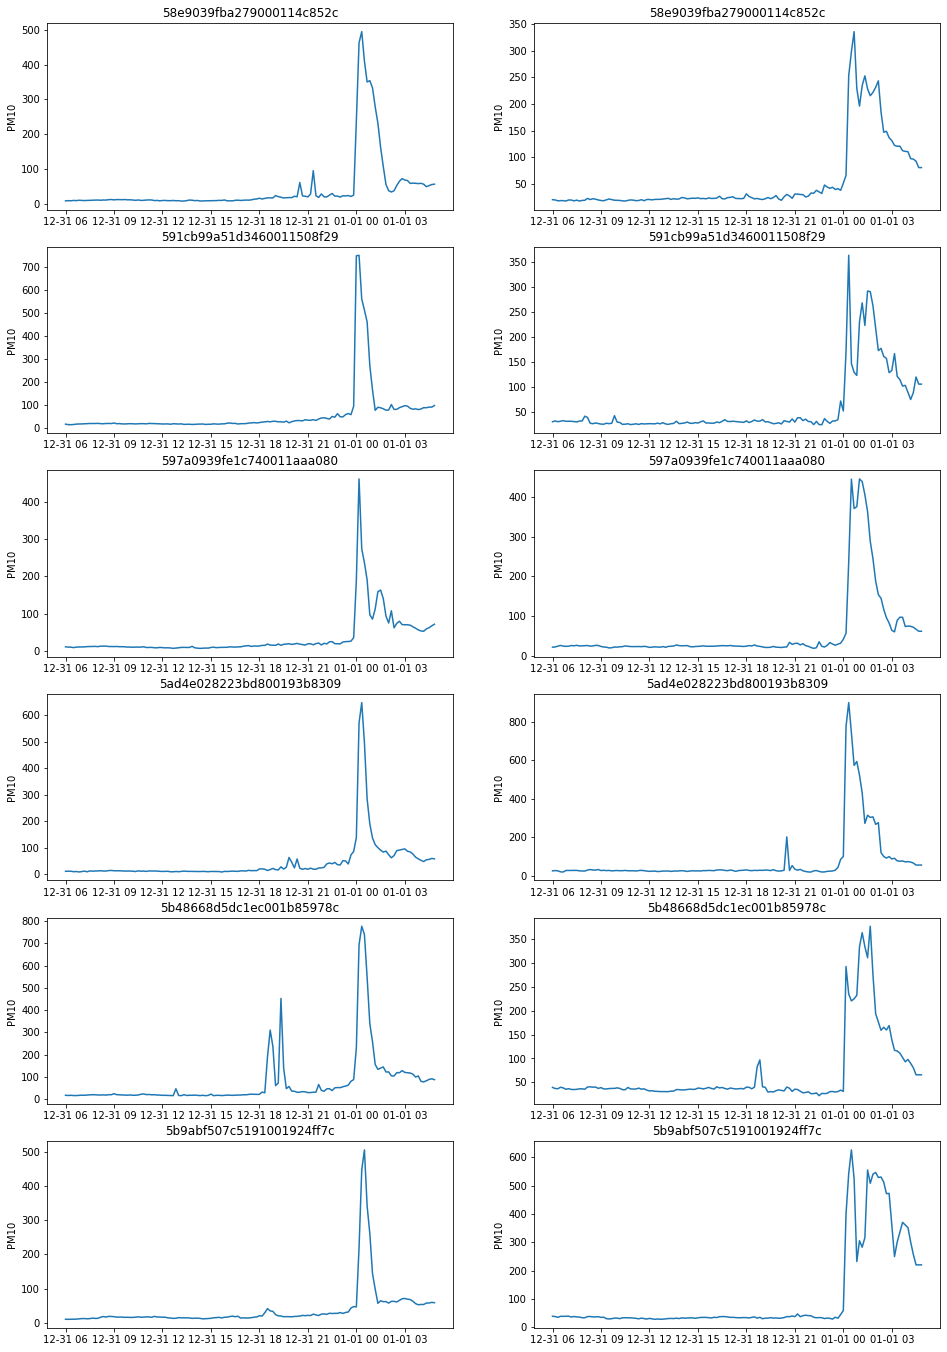

In [21]:
plot_all_sensors("Frankfurt",city_data_dfs)

##### Stuttgart

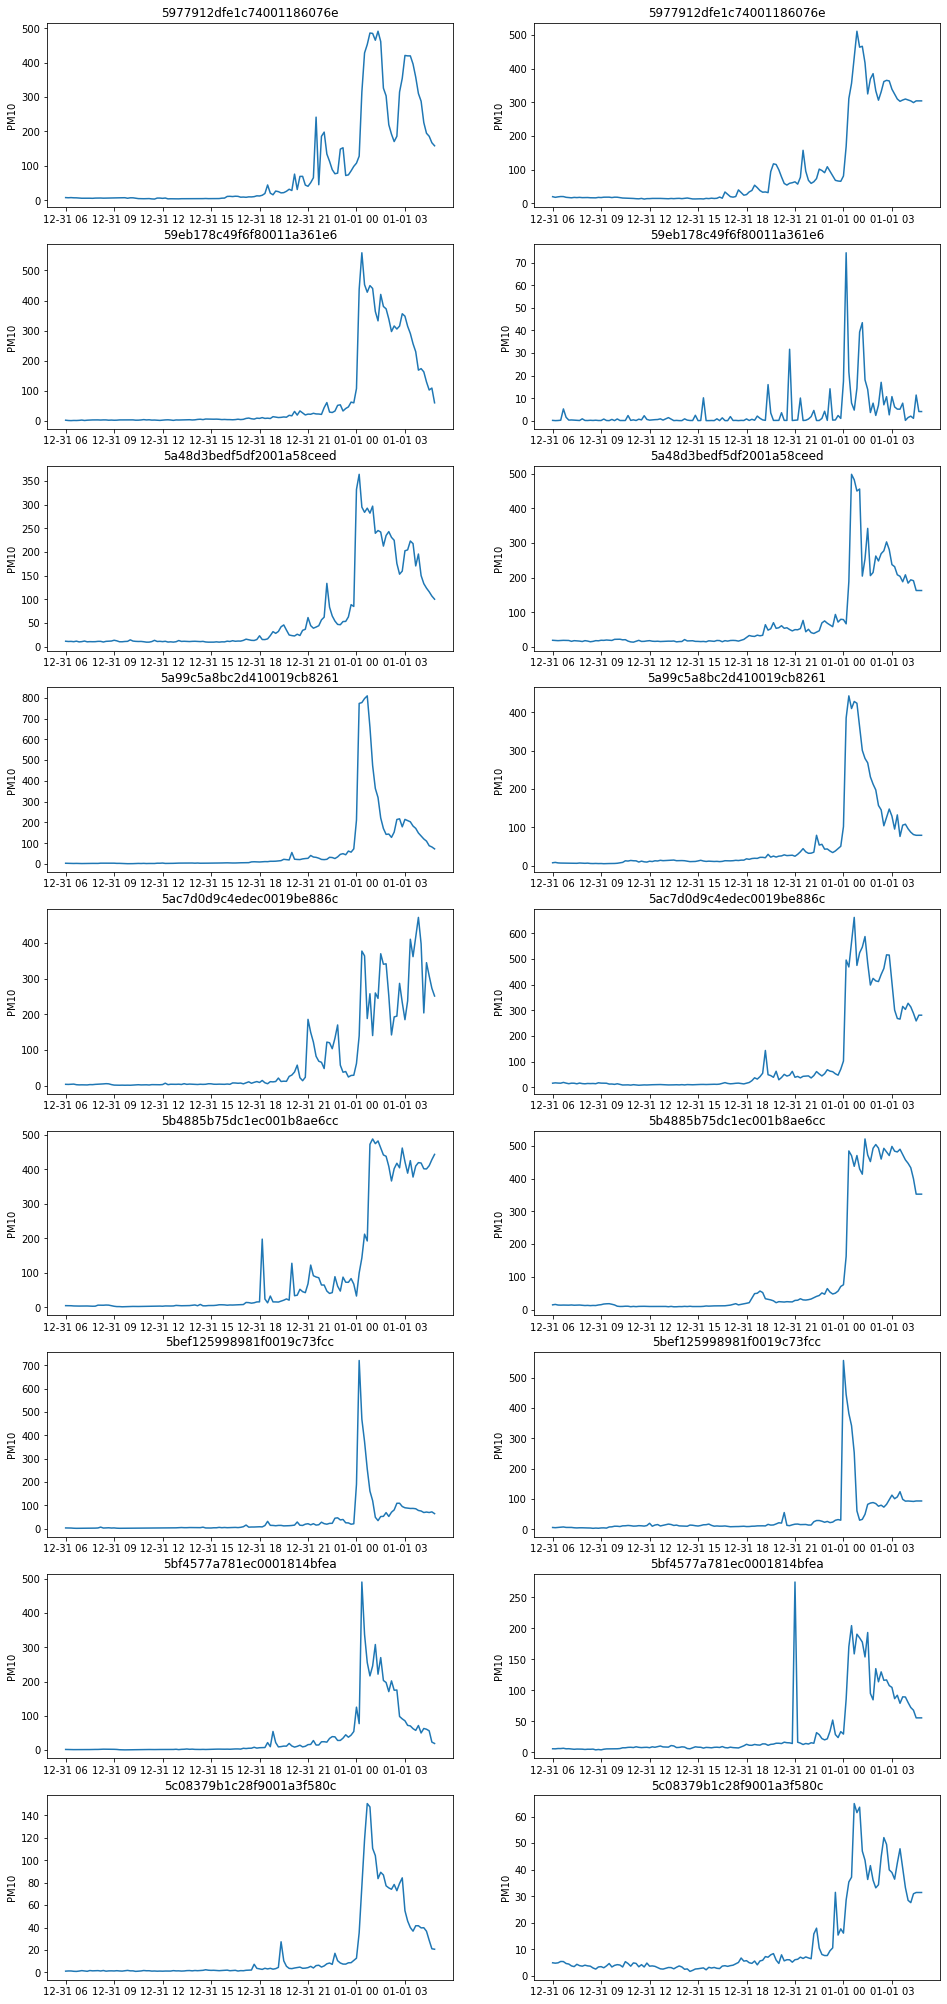

In [22]:
plot_all_sensors("Stuttgart",city_data_dfs)

In [23]:
# One sensor is off
off_sensors = ["59eb178c49f6f80011a361e6"]
city_data_dfs["Stuttgart"] = drop_sensors_and_recal_mean(off_sensors,city_data_dfs["Stuttgart"])



In [24]:
plot_all_sensors("Nürnberg",city_data_dfs)

KeyError: 'Nürnberg'

##### Leipzig

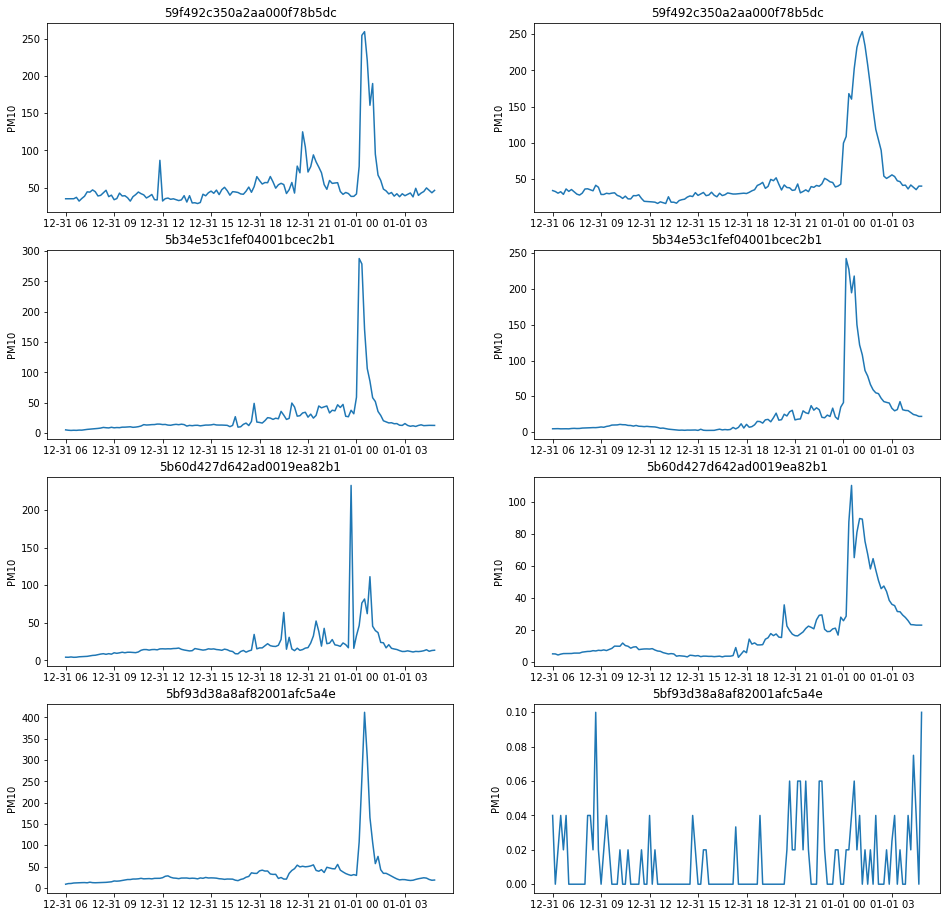

In [25]:
plot_all_sensors("Leipzig",city_data_dfs)

In [26]:
# One sensor is off
off_sensors = ['5bf93d38a8af82001afc5a4e']
city_data_dfs["Leipzig"] = drop_sensors_and_recal_mean(off_sensors,city_data_dfs["Leipzig"])



##### Münster

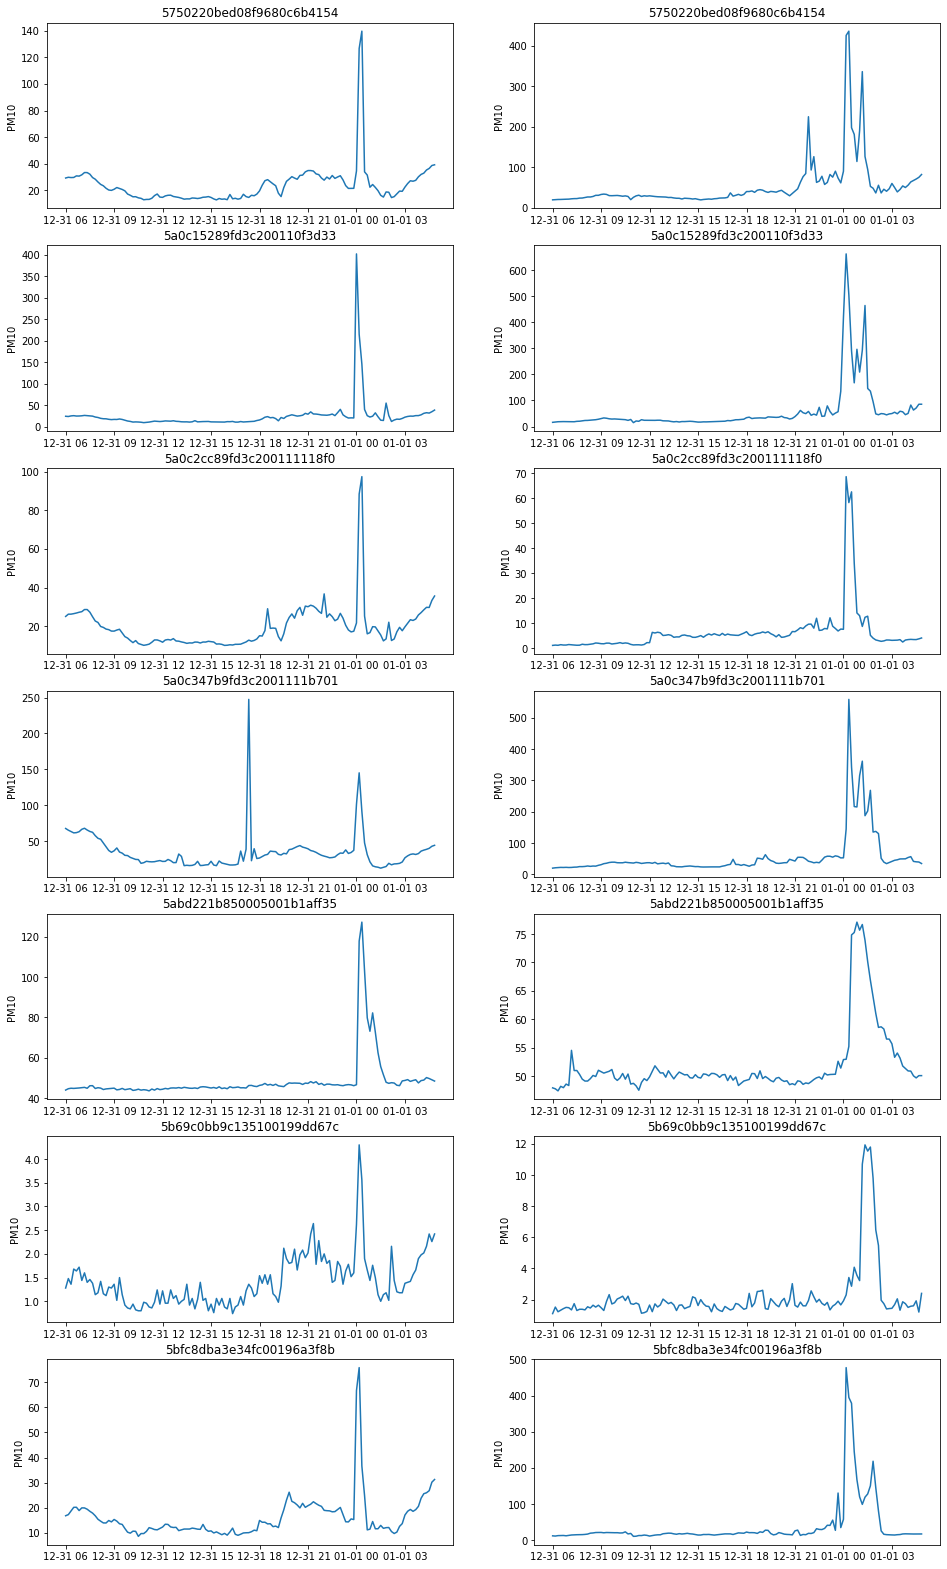

In [28]:
plot_all_sensors("Muenster",city_data_dfs)

In [29]:
# one sensor is off, and barely measuring anything, so we drop it

off_sensors = ['5b69c0bb9c135100199dd67c']
city_data_dfs["Muenster"] = drop_sensors_and_recal_mean(off_sensors,city_data_dfs["Muenster"])


##### Duisburg

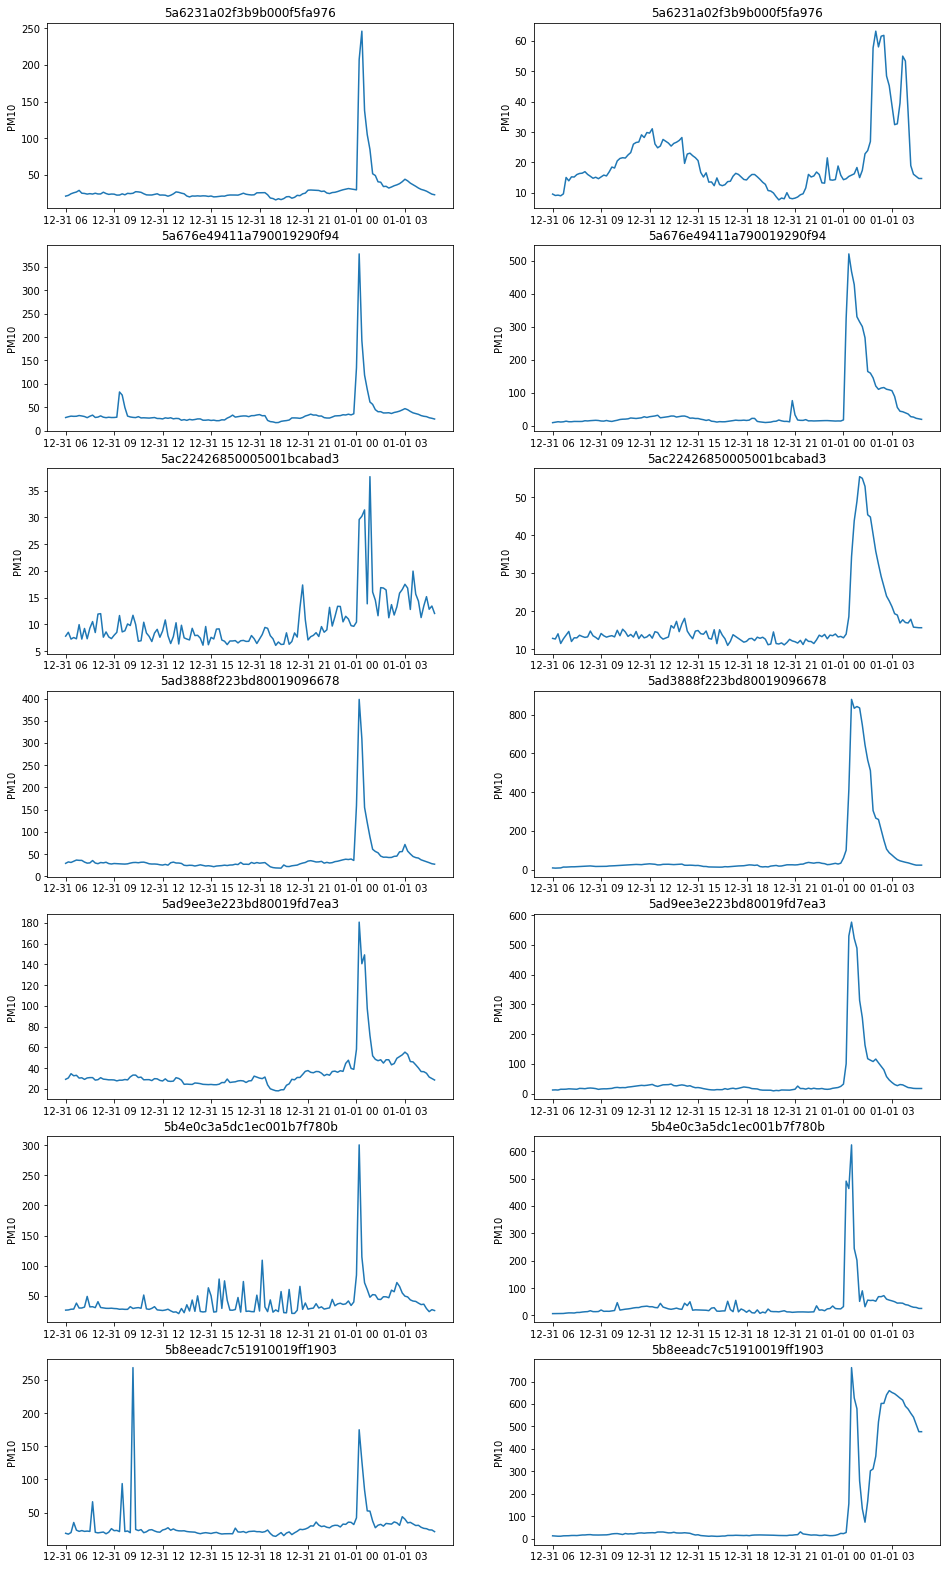

In [30]:
plot_all_sensors("Duisburg",city_data_dfs)

In [31]:
# one sensor is off, and barely measuring anything, so we drop it

off_sensors = ['5b8eeadc7c51910019ff1903']
city_data_dfs["Duisburg"] = drop_sensors_and_recal_mean(off_sensors,city_data_dfs["Duisburg"])


#### Nürnberg

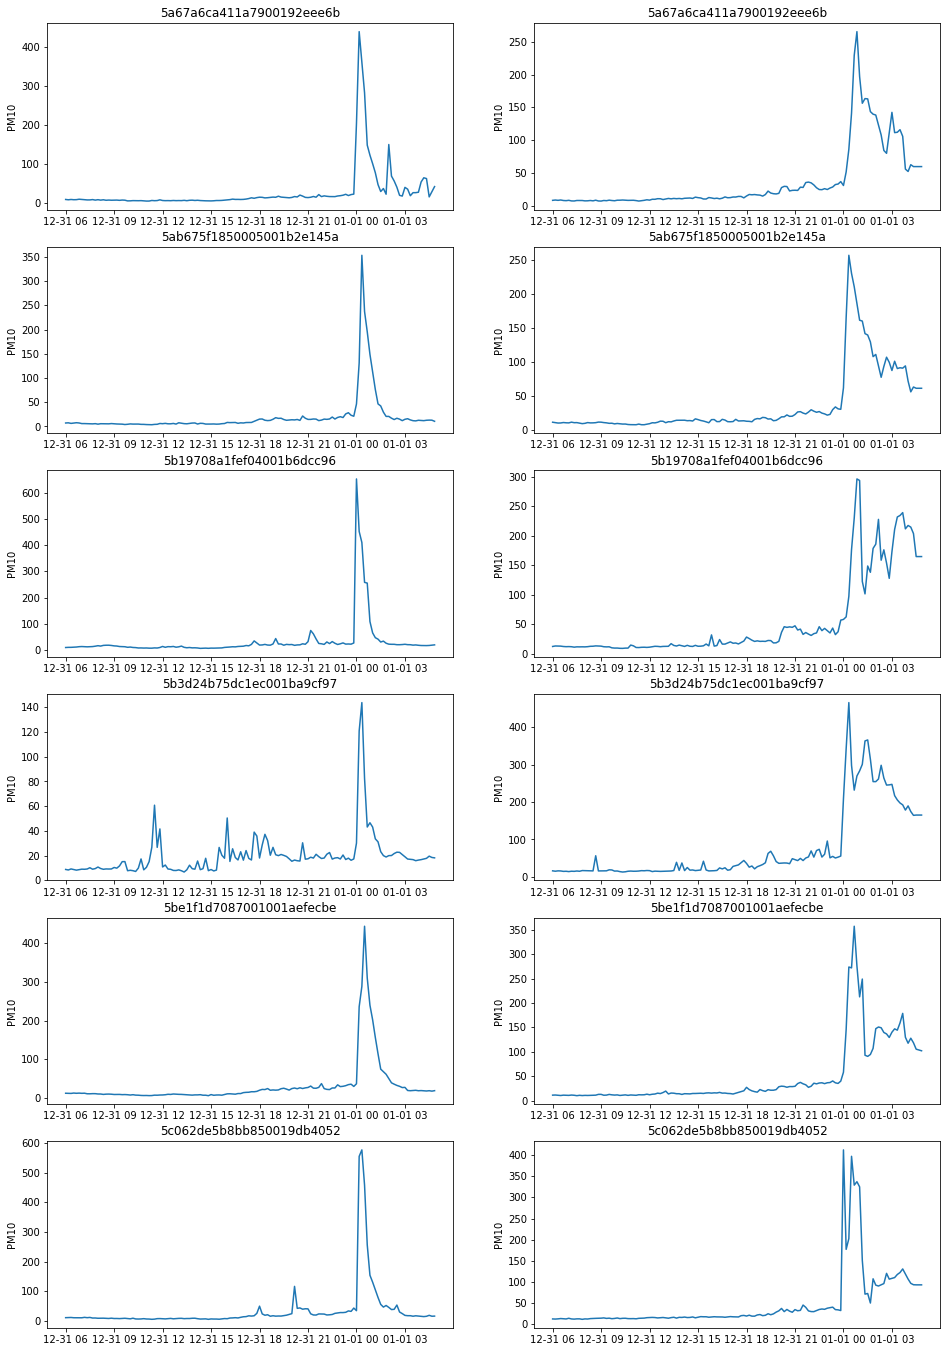

In [32]:
plot_all_sensors("Nuernberg",city_data_dfs)

### Save the changes

In [55]:
with open('data/city_data_dfs_PM25.pickle', 'wb') as handle:
    pickle.dump(city_data_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

### second plot of new averages

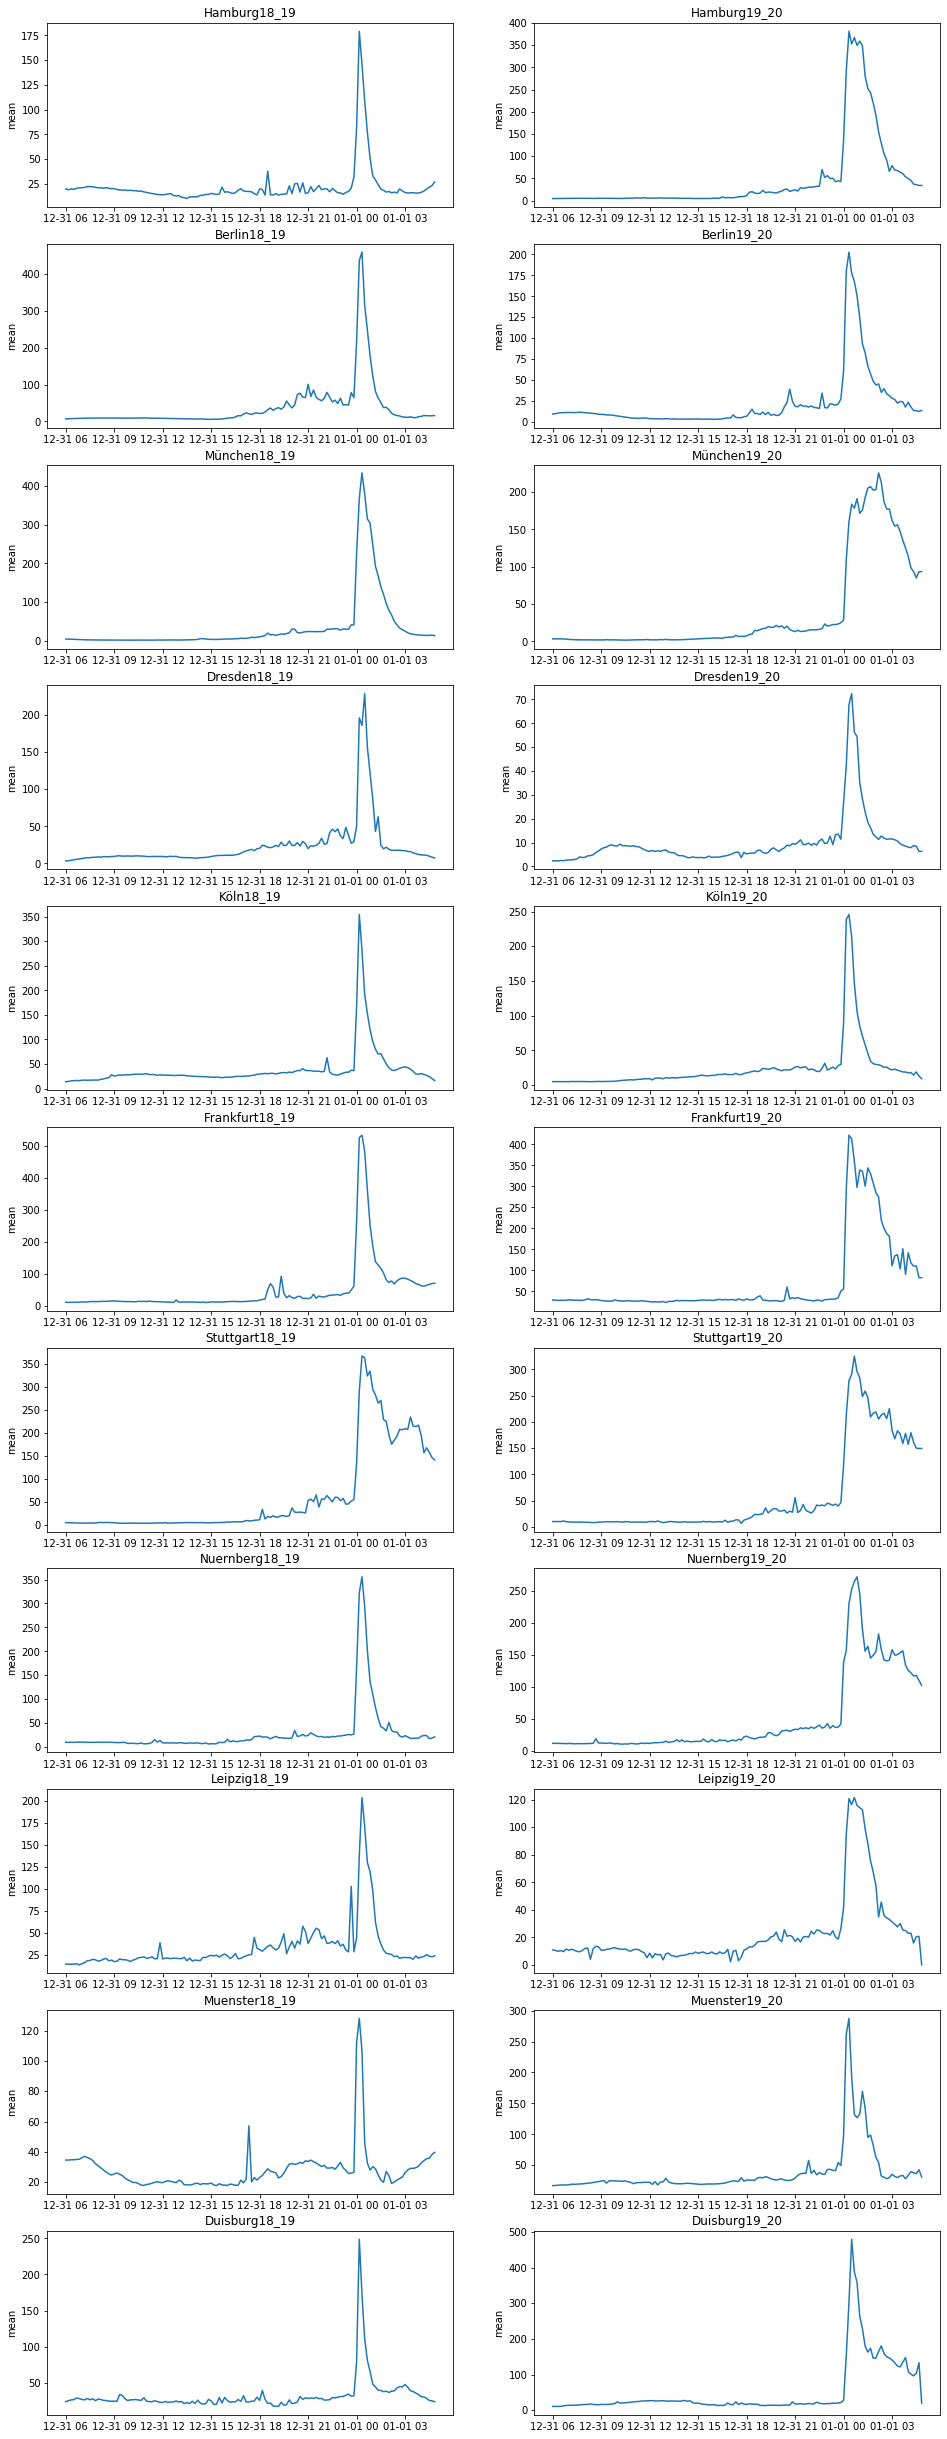

In [39]:
fig, ax = plt.subplots(len(cities),2,figsize=(16,4*len(cities)));


for i in range(len(cities)):
    sns.lineplot(data=city_data_dfs[cities[i]]["18_19"],
                 x="date_time",
                 y="mean",
                 ax=ax[i,0]);
    ax[i,0].set(title = cities[i]+"18_19",
                xlabel = "")
    
    sns.lineplot(data=city_data_dfs[cities[i]]["19_20"],
                 x="date_time",
                 y="mean",
                 ax=ax[i,1]);
    ax[i,1].set(title = cities[i]+"19_20",
                xlabel = "")

## Comparing cities

### average PM10 value for each city

In [56]:
# we only consider a limited timeframe
time_frame_analysis = {"18_19": [pd.to_datetime("2018-12-31 18:00:00"),pd.to_datetime("2019-01-01 02:00:00")],
                       "19_20": [pd.to_datetime("2019-12-31 18:00:00"),pd.to_datetime("2020-01-01 02:00:00")]}

In [57]:
# calculate the mean for a time frame
def mean_pm10_in_timeframe(city_df,time_frame):
    return     {"18_19": (city_df["18_19"].loc[city_df["18_19"]["date_time"].ge(time_frame["18_19"][0])
                                              & city_df["18_19"]["date_time"].le(time_frame["18_19"][1])
                                             ,"mean"]
                           .mean())
                 ,"19_20": (city_df["19_20"].loc[city_df["19_20"]["date_time"].ge(time_frame["19_20"][0])
                                              & city_df["19_20"]["date_time"].le(time_frame["19_20"][1])
                                             ,"mean"]
                           .mean())
                }

In [58]:
# add the info to the data for every city
for city in city_data_dfs:
    city_data_dfs[city]["mean_pm10_16_04"] = mean_pm10_in_timeframe(city_data_dfs[city],time_frame_analysis)

In [59]:
# re-order the cities for later display

cites_other_order = (["Hamburg","Münster","Nürnberg","Frankfurt"] 
                      +
                      ["Stuttgart","Berlin","München","Köln","Dresden","Leipzig"]);

In [60]:
# create a dataframe the the mean info for all cities
cities_mean_polution = pd.DataFrame([
                                     {"city":city,
                                      "18_19": city_data_dfs[city]["mean_pm10_16_04"]["18_19"],
                                      "19_20": city_data_dfs[city]["mean_pm10_16_04"]["19_20"]
                                     } for city in cites_other_order
                                    ]
                                   )

In [61]:
# re-arrage the df for easier side-by-side plotting
cities_mean_polution = pd.concat([cities_mean_polution[["city","18_19"]]
                                  .assign(year="18_19")
                                  .rename(columns = {"18_19":"value"}),
                                 cities_mean_polution[["city","19_20"]]
                                  .assign(year="19_20")
                                  .rename(columns = {"19_20":"value"})              
                                 ],
                                axis = 0,
                                sort=False
                                )

In [62]:
## add the mean over all cities
cities_mean_polution = pd.concat([cities_mean_polution,
                                  pd.DataFrame([{"city":"MEAN","value":96.438979,"year":"18_19"},
                                                {"city":"MEAN","value":107.946285,"year":"19_20"}])],
                                 axis=0,
                                 sort=False)

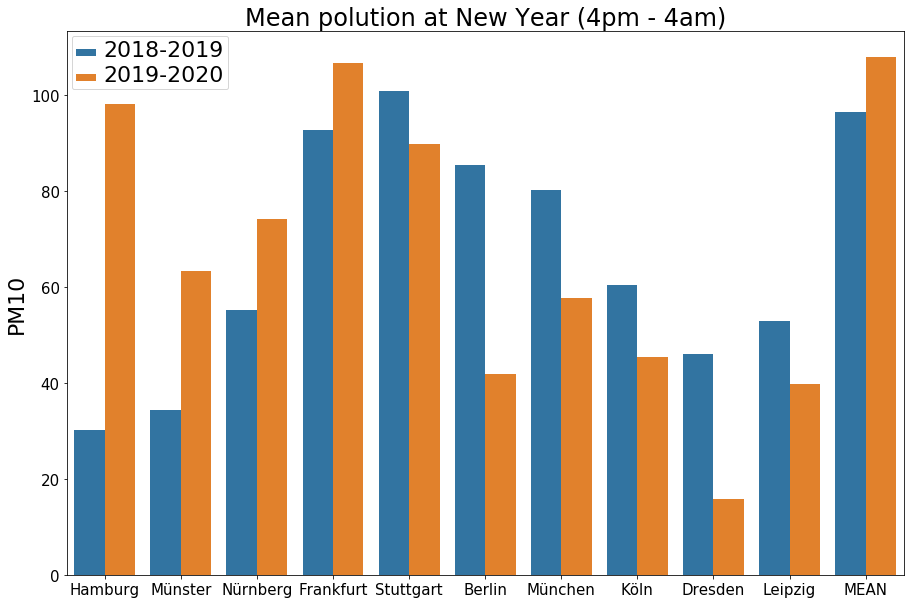

In [63]:
fig, ax = plt.subplots(figsize=(15,10))
s = sns.barplot(data = cities_mean_polution,
            x = "city",
            y = "value",
            hue = "year")


# change labels and fontsize
plt.xlabel('')
plt.ylabel('PM10', fontsize=22)
plt.title("Mean polution at New Year (4pm - 4am)", fontsize=24)


ax.tick_params(axis='both', which='major', labelsize=15)



# change lables and fontsize of legend
labels = ["2018-2019","2019-2020"]

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="")

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text



plt.show(s)

In [5]:
cities_weather

,Hamburg,Berlin,München,Dresden,Köln,Frankfurt,Stuttgart,Nürnberg,Leipzig,Münster,Duisburg
precipMM,"[0.3, 0.0]","[0.1, 0.0]","[0.0, 0.0]","[0.1, 0.1]","[0.1, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.1, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
humidity,"[89, 96]","[91, 93]","[97, 80]","[91, 78]","[91, 86]","[95, 87]","[95, 77]","[96, 85]","[90, 90]","[90, 95]","[89, 89]"
tempC,"[6, 2]","[5, 3]","[0, 0]","[3, 4]","[8, 1]","[5, 2]","[3, 4]","[2, -1]","[4, 2]","[8, 1]","[8, 4]"
windspeedKmph,"[23, 9]","[17, 12]","[9, 4]","[18, 16]","[10, 9]","[6, 5]","[2, 3]","[8, 3]","[17, 13]","[20, 6]","[14, 5]"
winddirDegree,"[258, 265]","[263, 285]","[268, 96]","[267, 280]","[260, 111]","[230, 44]","[199, 118]","[258, 101]","[253, 253]","[256, 143]","[253, 116]"
pressure,"[1026, 1034]","[1027, 1033]","[1035, 1036]","[1029, 1035]","[1033, 1035]","[1034, 1036]","[1035, 1036]","[1034, 1037]","[1029, 1035]","[1031, 1036]","[1032, 1035]"


In Hamburg and Münster there was significantly higher wind speeds for 2018 --> polution was blown away faster

### Compare results to average of median over sensors

In [64]:
# we only consider a limited timeframe
time_frame_analysis = {"18_19": [pd.to_datetime("2018-12-31 18:00:00"),pd.to_datetime("2019-01-01 02:00:00")],
                       "19_20": [pd.to_datetime("2019-12-31 18:00:00"),pd.to_datetime("2020-01-01 02:00:00")]}

In [65]:
# calculate the mean for a time frame
def mean_pm10_in_timeframe_median(city_df,time_frame):
    return_df_1819 = (city_df["18_19"].loc[city_df["18_19"]["date_time"].ge(time_frame["18_19"][0])
                                           & city_df["18_19"]["date_time"].le(time_frame["18_19"][1])
                                           ,:
                                          ].drop(columns = "mean"))
    
    return_df_1920 = (city_df["19_20"].loc[city_df["19_20"]["date_time"].ge(time_frame["19_20"][0])
                                              & city_df["19_20"]["date_time"].le(time_frame["19_20"][1])
                                           ,:
                                          ].drop(columns = "mean"))
                      
    return_df_1819["median"] = return_df_1819.drop(columns = "date_time").median(axis=1)
    return_df_1920["median"] = return_df_1920.drop(columns = "date_time").median(axis=1)
    
    
    
    return     {"18_19": return_df_1819["median"].mean()
                ,"19_20": return_df_1920["median"].mean()
                }

In [66]:
# add the info to the data for every city
for city in city_data_dfs:
    city_data_dfs[city]["mean_pm10_16_04_median"] = mean_pm10_in_timeframe_median(city_data_dfs[city],time_frame_analysis)

In [67]:
# re-order the cities for later display

cites_other_order = (["Münster","Hamburg","Leipzig","Nürnberg","Köln","Stuttgart","Frankfurt"] 
                      +
                      ["München","Berlin","Dresden"]);

In [68]:
# create a dataframe the the mean info for all cities
cities_mean_median_polution = pd.DataFrame([
                                             {"city":city,
                                              "18_19": city_data_dfs[city]["mean_pm10_16_04_median"]["18_19"],
                                              "19_20": city_data_dfs[city]["mean_pm10_16_04_median"]["19_20"]
                                             } for city in cites_other_order
                                            ]
                                           )

In [69]:
# re-arrage the df for easier side-by-side plotting
cities_mean_median_polution = pd.concat([cities_mean_median_polution[["city","18_19"]]
                                          .assign(year="18_19")
                                          .rename(columns = {"18_19":"value"}),
                                         cities_mean_median_polution[["city","19_20"]]
                                          .assign(year="19_20")
                                          .rename(columns = {"19_20":"value"})              
                                        ],
                                        axis = 0,
                                        sort=False
                                       )

In [70]:

## add the mean over all cities
cities_mean_median_polution = pd.concat([cities_mean_median_polution,
                                  pd.DataFrame([{"city":"MEAN",
                                                 "value":cities_mean_median_polution.groupby(by = "year").mean().loc["18_19"].values[0],
                                                 "year":"18_19"},
                                                {"city":"MEAN",
                                                 "value":cities_mean_median_polution.groupby(by = "year").mean().loc["19_20"].values[0],
                                                 "year":"19_20"}])],
                                 axis=0,
                                 sort=False)

In [71]:
## add the mean over all cities
cities_mean_median_polution = pd.concat([cities_mean_median_polution,
                                  pd.DataFrame([{"city":"MEDIAN",
                                                 "value":(cities_mean_median_polution
                                                          .loc[~cities_mean_median_polution.city.eq("MEAN"),]
                                                          .groupby(by = "year")
                                                          .median()
                                                          .loc["18_19"]
                                                          .values[0]
                                                         ),
                                                 "year":"18_19"},
                                                {"city":"MEDIAN",
                                                 "value":(cities_mean_median_polution
                                                          .loc[~cities_mean_median_polution.city.eq("MEAN"),]
                                                          .groupby(by = "year")
                                                          .median()
                                                          .loc["19_20"]
                                                          .values[0]
                                                         ),
                                                 "year":"19_20"}])],
                                 axis=0,
                                 sort=False)

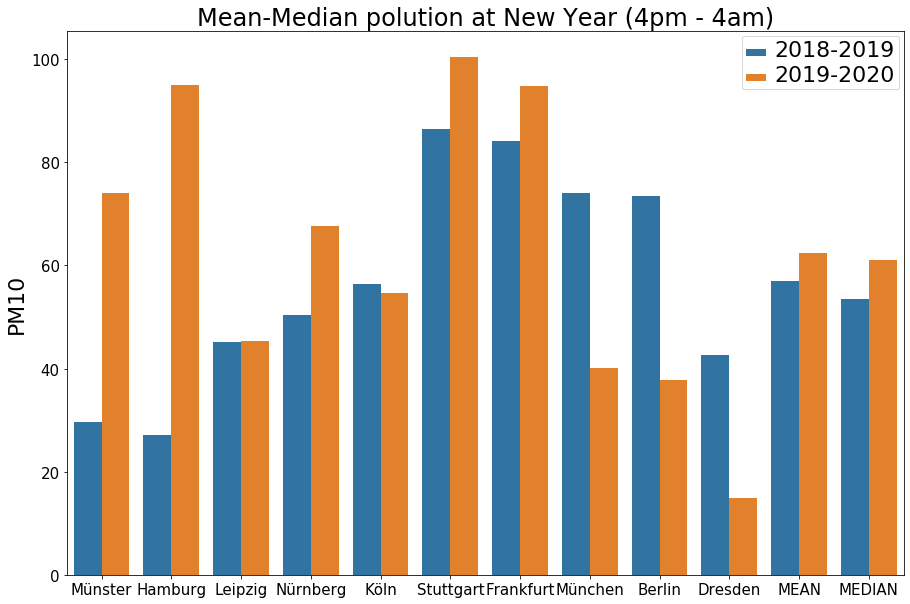

In [72]:
fig, ax = plt.subplots(figsize=(15,10))
s = sns.barplot(data = cities_mean_median_polution,
            x = "city",
            y = "value",
            hue = "year")


# change labels and fontsize
plt.xlabel('')
plt.ylabel('PM10', fontsize=22)
plt.title("Mean-Median polution at New Year (4pm - 4am)", fontsize=24)


ax.tick_params(axis='both', which='major', labelsize=15)



# change lables and fontsize of legend
labels = ["2018-2019","2019-2020"]

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="")

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text



plt.show(s)

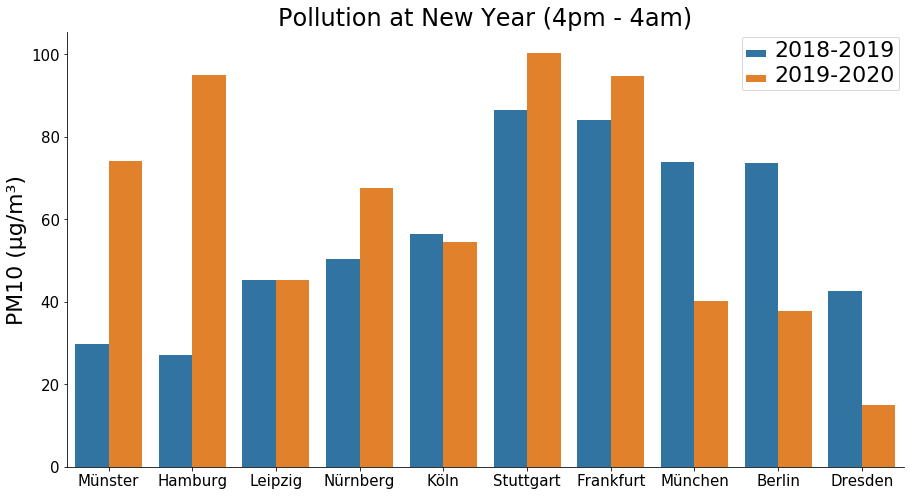

In [73]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data = (cities_mean_median_polution
                        .loc[~cities_mean_median_polution.city.isin(["MEAN","MEDIAN"]),]),
            x = "city",
            y = "value",
            hue = "year",
            ax=ax)


# change labels and fontsize
plt.xlabel('')
plt.ylabel('PM10 (µg/m³)', fontsize=22)
plt.title("Pollution at New Year (4pm - 4am)", fontsize=24)


ax.tick_params(axis='both', which='major', labelsize=15)



# change lables and fontsize of legend
labels = ["2018-2019","2019-2020"]

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="")

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);




plt.savefig("presentation/new_year_cities.png")

In [74]:
cities_weather[cites_other_order]

,Münster,Hamburg,Leipzig,Nürnberg,Köln,Stuttgart,Frankfurt,München,Berlin,Dresden
precipMM,"[0.0, 0.0]","[0.3, 0.0]","[0.0, 0.0]","[0.1, 0.0]","[0.1, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.1, 0.0]","[0.1, 0.1]"
humidity,"[90, 95]","[89, 96]","[90, 90]","[96, 85]","[91, 86]","[95, 77]","[95, 87]","[97, 80]","[91, 93]","[91, 78]"
tempC,"[8, 1]","[6, 2]","[4, 2]","[2, -1]","[8, 1]","[3, 4]","[5, 2]","[0, 0]","[5, 3]","[3, 4]"
windspeedKmph,"[20, 6]","[23, 9]","[17, 13]","[8, 3]","[10, 9]","[2, 3]","[6, 5]","[9, 4]","[17, 12]","[18, 16]"
winddirDegree,"[256, 143]","[258, 265]","[253, 253]","[258, 101]","[260, 111]","[199, 118]","[230, 44]","[268, 96]","[263, 285]","[267, 280]"
pressure,"[1031, 1036]","[1026, 1034]","[1029, 1035]","[1034, 1037]","[1033, 1035]","[1035, 1036]","[1034, 1036]","[1035, 1036]","[1027, 1033]","[1029, 1035]"


#### Differences between 18/19 and 19/20

In [75]:
# create a dataframe the the mean info for all cities
cities_mean_median_polution_diff = pd.DataFrame([
                                             {"city":city,
                                              "18_19": city_data_dfs[city]["mean_pm10_16_04_median"]["18_19"],
                                              "19_20": city_data_dfs[city]["mean_pm10_16_04_median"]["19_20"]
                                             } for city in cites_other_order
                                            ]
                                           )

In [76]:
cities_mean_median_polution_diff["diff"] = (cities_mean_median_polution_diff["18_19"]
                                             - cities_mean_median_polution_diff["19_20"])
neg_df = cities_mean_median_polution_diff.copy()
neg_df.loc[neg_df["diff"].ge(0),"diff"] = 0
pos_df = cities_mean_median_polution_diff.copy()
pos_df.loc[pos_df["diff"].le(0),"diff"] = 0



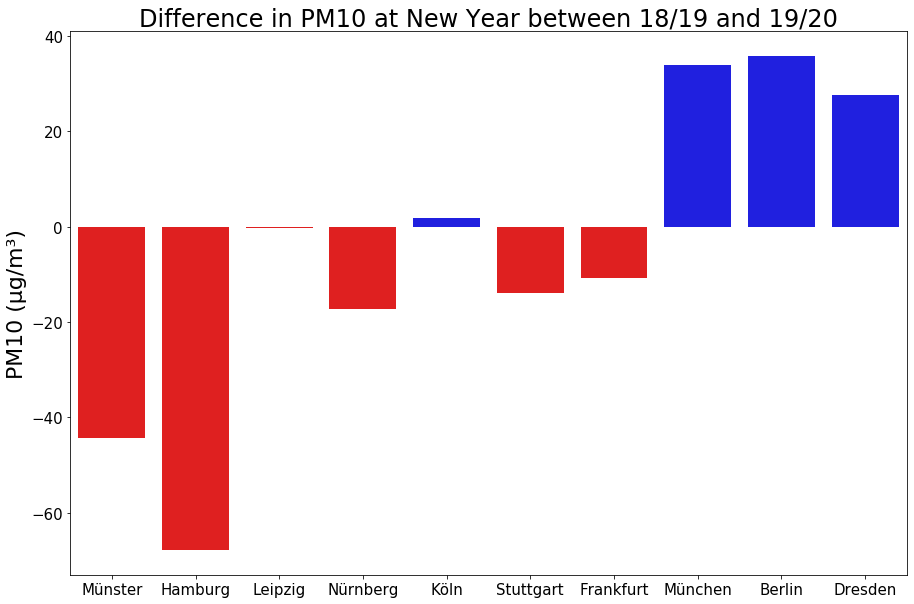

In [77]:
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(data = pos_df,
                x = "city",
                y = "diff",
                color="blue",ax=ax)

sns.barplot(data = neg_df,
                x = "city",
                y = "diff",
                color="red",ax=ax)




# change labels and fontsize
plt.xlabel('')
plt.ylabel('PM10 (µg/m³)', fontsize=22)
plt.title("Difference in PM10 at New Year between 18/19 and 19/20", fontsize=24)
#plt.ylim([-120,50])


ax.tick_params(axis='both', which='major', labelsize=15)






#plt.show(s)

#### mean and median

Text(0, 0.5, 'PM10')

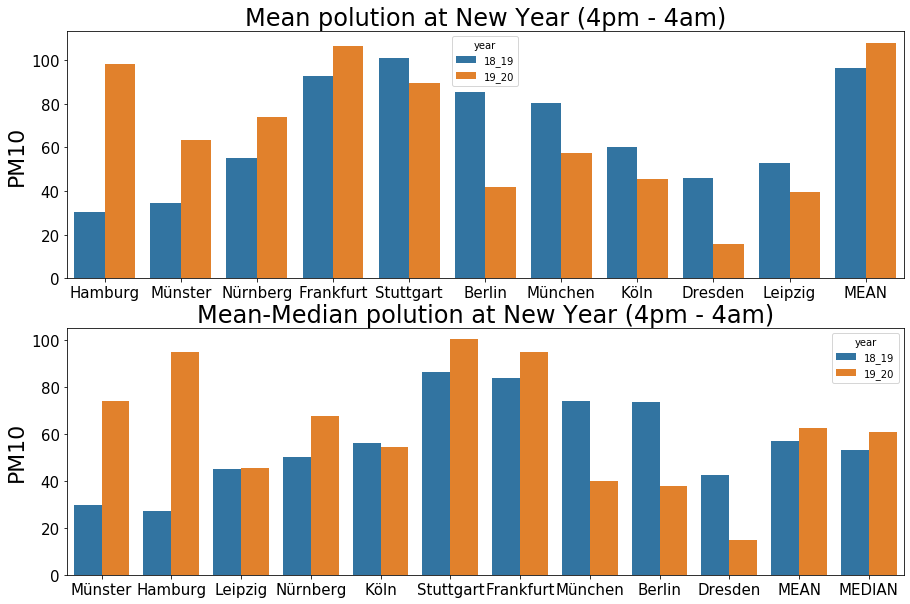

In [78]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
s1 = sns.barplot(data = cities_mean_polution,
            x = "city",
            y = "value",
            hue = "year",
            ax=ax[0])


# change labels and fontsize
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].set_title("Mean polution at New Year (4pm - 4am)", fontsize=24)
ax[0].set_xlabel('')
ax[0].set_ylabel('PM10', fontsize=22)


# change lables and fontsize of legend
labels = ["2018-2019","2019-2020"]

#h, l = ax[0].get_legend_handles_labels()
#ax[0].legend(h, labels, title="")

#plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text


s2 = sns.barplot(data = cities_mean_median_polution,
            x = "city",
            y = "value",
            hue = "year",
            ax=ax[1])


# change labels and fontsize
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].set_title("Mean-Median polution at New Year (4pm - 4am)", fontsize=24)
ax[1].set_xlabel('')
ax[1].set_ylabel('PM10', fontsize=22)


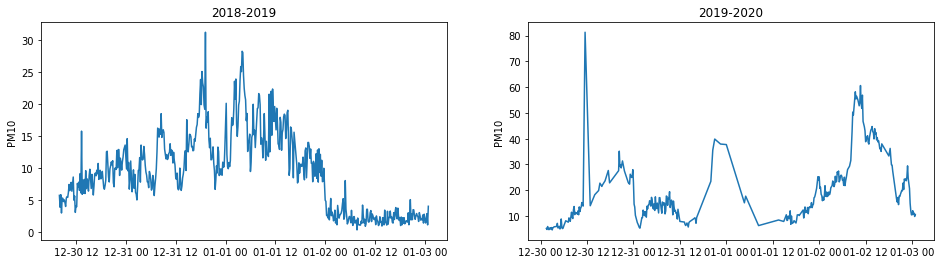

In [251]:
data_malmoe["19_20"]

,date_time,value
0,2018-12-30 01:00:00,NaN
1,2018-12-30 01:10:00,NaN
2,2018-12-30 01:20:00,NaN
3,2018-12-30 01:30:00,NaN
4,2018-12-30 01:40:00,NaN
...,...,...
571,2019-01-03 00:10:00,NaN
572,2019-01-03 00:20:00,NaN
573,2019-01-03 00:30:00,NaN
574,2019-01-03 00:40:00,NaN


## Yearly Feinstaub emmision by sector

In [76]:
sectors = pd.DataFrame({"Source":["Economy","Traffic","Private Households","Fireworks","Powerplants","Agriculture"],
              "Feinstaub": [74,64,29,4,19,15]})

In [80]:
sectors["fraction"] = 100*sectors["Feinstaub"]/sectors["Feinstaub"].sum()

In [81]:
sectors

,Source,Feinstaub,fraction
0,Economy,74,36.097561
1,Traffic,64,31.219512
2,Private Households,29,14.146341
3,Fireworks,4,1.951220
4,Powerplants,19,9.268293
5,Agriculture,15,7.317073
